In [2]:
import pandas as pd
import plotly.express as px

# Cargar el conjunto de datos desde el archivo CSV
data = pd.read_csv('../vehicles_us.csv')

# Mostrar las primeras 5 filas del DataFrame para verificar
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
## Exploracion de Datos Debemos asegurarnos de que no haya valores faltantes o tipos de datos incorrectos que puedan afectar el análisis.
# Muestra un resumen de los tipos de datos y los valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
#Hay 13 columnas y 51,525 registros en total.
#Varios campos tienen menos de 51,525 valores no nulos. Esto significa que tienen valores ausentes o faltantes, #
# como model_year, cylinders, odometer, paint_color y is_4wd. Esto es normal en los datos reales.
#También vemos que las columnas model, condition, fuel, type, paint_color y date_posted son de tipo object (texto).
# Contar el número de valores faltantes en cada columna
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [6]:
## Con los valores ausentes se define rellenar los valores ausentes
## Columnas numéricas (model_year, cylinders, odometer)
## Usaremos la mediana para rellenar los valores faltantes. La mediana es una mejor opción que el promedio porque no se ve afectada por valores atípicos (muy altos o muy bajos).
## Columna categórica (paint_color)
## Vamos a rellenar los valores faltantes con la etiqueta 'desconocido'.
## Columna binaria (is_4wd)
## Como esta columna indica si el vehículo tiene tracción en las 4 ruedas o no, es seguro asumir que un valor faltante significa que no la tiene. Por eso, rellenaremos los valores faltantes con un 0.


# Rellenar los valores ausentes en las columnas numéricas con la mediana
data['model_year'] = data['model_year'].fillna(data['model_year'].median())
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].median())
data['odometer'] = data['odometer'].fillna(data['odometer'].median())

# Rellenar los valores ausentes en la columna 'paint_color' con 'desconocido'
data['paint_color'] = data['paint_color'].fillna('desconocido')

# Rellenar los valores ausentes en la columna 'is_4wd' con 0
data['is_4wd'] = data['is_4wd'].fillna(0)

##Verificar que ya no hay valores ausentes
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [8]:
## Siguiente paso: Tipos de datos y valores atípicos
## Ahora que los datos están limpios, el siguiente paso es verificar los tipos de datos y buscar valores atípicos (outliers) en las columnas numéricas.
## Muestra los tipos de datos de cada columna
data.dtypes


price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [10]:
## Análisis de los tipos de datos
## El resultado de data.dtypes nos confirma que la mayoría de las columnas de texto están correctamente como tipo object. Sin embargo, hay dos columnas que debemos cambiar:
## is_4wd: Aparece como tipo object, lo cual es incorrecto. Debe ser de tipo numérico (entero), ya que solo contiene valores 0 y 1.
## date_posted: Aparece como tipo object, pero es una fecha. Debe ser de tipo datetime para poder hacer análisis con el tiempo.

# Convertir la columna 'is_4wd' a tipo int
data['is_4wd'] = data['is_4wd'].astype(int)
# Convertir la columna 'date_posted' a tipo datetime
data['date_posted'] = pd.to_datetime(data['date_posted'])
data.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [11]:
# Muestra estadísticas descriptivas de las columnas numéricas
data.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000
mean,12132.464920,2009.838234,6.112450,115162.352179,0.496303,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.00000
25%,5000.000000,2007.000000,4.000000,79181.000000,0.000000,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.00000
std,10040.803015,6.065836,1.573784,59909.264385,0.499991,NaN,28.20427


In [13]:
## Análisis de los valores atípicos
## 3El resultado de data.describe() nos muestra claramente la presencia de valores atípicos, especialmente en las siguientes columnas:
## price: El precio promedio es de 12,132, pero el valor máximo es de $3,750,000. Esto es un valor extremadamente atípico que podría distorsionar cualquier análisis.
## odometer: El promedio es de 115,162, pero el valor máximo es de 99,000,000. Esto es probablemente un error de entrada de datos y también es un valor atípico extremo.
## model_year: El valor mínimo es 1908, que parece un error, ya que la mayoría de los vehículos son mucho más recientes.

## Eliminar valores atípicos
## Para continuar, vamos a crear un nuevo DataFrame filtrando estos valores extremos. Esto hará que el resto de nuestro análisis sea más preciso y significativo.
## Copia y pega el siguiente código en una nueva celda de tu cuaderno y ejecútalo. Esto filtrará los datos para eliminar los valores atípicos en price y odometer
## y también los años de modelo que no son realistas.

# Definir un rango razonable para cada columna
data = data[(data['price'] < 100000) & (data['odometer'] < 500000)]
data = data[data['model_year'] > 1950]

# Muestra el tamaño del nuevo DataFrame
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 51477 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51477 non-null  int64         
 1   model_year    51477 non-null  float64       
 2   model         51477 non-null  object        
 3   condition     51477 non-null  object        
 4   cylinders     51477 non-null  float64       
 5   fuel          51477 non-null  object        
 6   odometer      51477 non-null  float64       
 7   transmission  51477 non-null  object        
 8   type          51477 non-null  object        
 9   paint_color   51477 non-null  object        
 10  is_4wd        51477 non-null  int64         
 11  date_posted   51477 non-null  datetime64[ns]
 12  days_listed   51477 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.5+ MB


,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51477.000000,51477.000000,51477.000000,51477.000000,51477.000000,51477,51477.000000
mean,12077.196787,2009.849467,6.112050,114863.897216,0.496474,2018-10-25 02:27:20.235444736,39.559901
min,1.000000,1954.000000,3.000000,0.000000,0.000000,2018-05-01 00:00:00,0.000000
25%,5000.000000,2007.000000,4.000000,79105.000000,0.000000,2018-07-29 00:00:00,19.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,2018-10-25 00:00:00,33.000000
75%,16800.000000,2014.000000,8.000000,146345.000000,1.000000,2019-01-21 00:00:00,53.000000
max,94955.000000,2019.000000,12.000000,498000.000000,1.000000,2019-04-19 00:00:00,271.000000
std,9512.088289,5.997507,1.573884,58282.573102,0.499992,NaN,28.207026


In [29]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.0 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 771.2 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 771.2 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 771.2 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 MB 653.8 kB/s eta 0:00:11
   ------- -------------------------------- 1.6/8.1 MB 653.8 kB/s eta 0:00:11
   ------- -----

In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


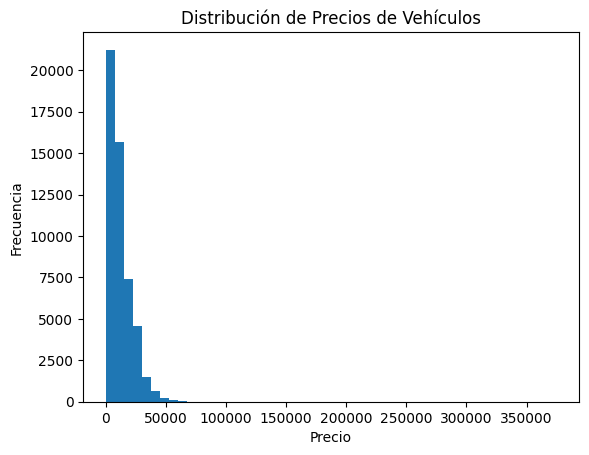

In [32]:
import matplotlib.pyplot as plt

# Crea un histograma para la columna 'price'
plt.hist(data['price'], bins=50)
plt.title('Distribución de Precios de Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Nos muestra la distribución del precio de los vehículos. La gran mayoría de los vehículos se concentra en precios más bajos, mientras que los precios más altos son menos comunes, como es de esperarse.

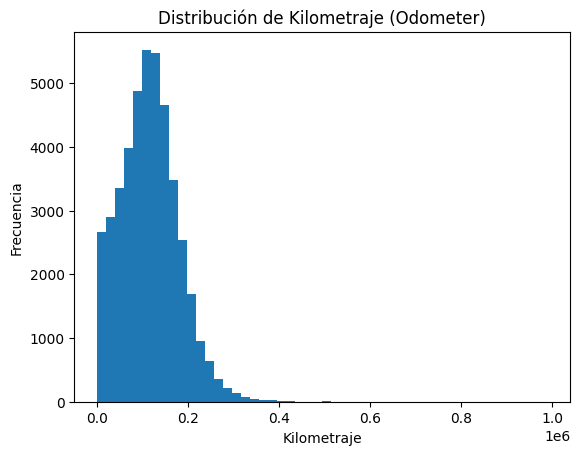

In [33]:
import matplotlib.pyplot as plt

# Crea un histograma para la columna 'odometer'
plt.hist(data['odometer'], bins=50)
plt.title('Distribución de Kilometraje (Odometer)')
plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.show()

El histograma para el odómetro nos muestra la distribución de los kilómetros de los vehículos. Al igual que con el precio, la mayoría de los vehículos se concentra en el lado izquierdo del gráfico, lo que indica que la mayoría de los autos tienen un kilometraje bajo o medio, mientras que menos autos tienen un kilometraje extremadamente alto.

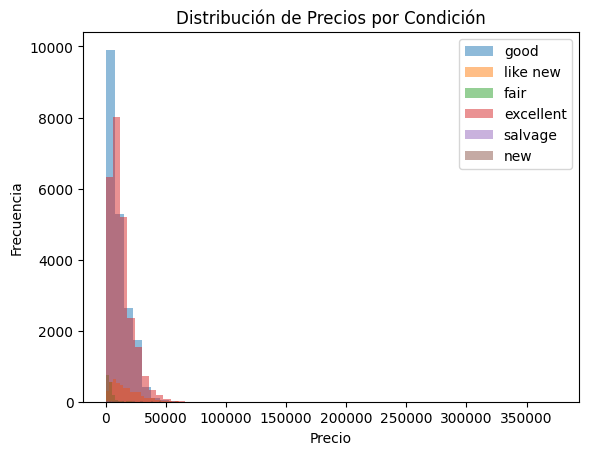

In [37]:
import matplotlib.pyplot as plt

# Obtener las condiciones únicas
conditions = data['condition'].unique()

# Crear un histograma para cada condición
for condition in conditions:
    subset = data[data['condition'] == condition]
    plt.hist(subset['price'], bins=50, alpha=0.5, label=condition)

plt.title('Distribución de Precios por Condición')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El gráfico que ves es un histograma agrupado. Nos muestra que la mayoría de los vehículos en casi todas las condiciones se encuentran en el rango de precios más bajos.
Puedes ver que hay una gran cantidad de autos en condición good y excellent, y sus precios se concentran en la parte izquierda del gráfico, lo que indica que son los más comunes.
Los autos en condición new se agrupan en un rango de precios un poco más alto, lo cual es lógico.
Los autos en condición salvage (salvamento) tienen precios muy bajos, lo que también tiene sentido.

Análisis de la relación entre variables
Ahora que hemos analizado las distribuciones de variables individuales, el siguiente paso es explorar la relación entre dos variables numéricas.

Una forma excelente de hacerlo es con un diagrama de dispersión (scatter plot). Vamos a crear uno para ver la relación entre el precio y el kilometraje (odometer).

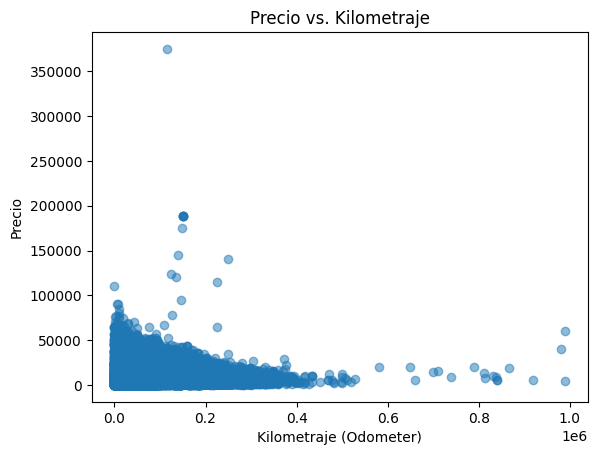

In [38]:
import matplotlib.pyplot as plt

# Crea un diagrama de dispersión de precio vs. odómetro
plt.scatter(data['odometer'], data['price'], alpha=0.5)
plt.title('Precio vs. Kilometraje')
plt.xlabel('Kilometraje (Odometer)')
plt.ylabel('Precio')
plt.show()

El gráfico de dispersión te muestra una relación clara y esperada:
Hay una correlación negativa entre el precio y el kilometraje.
Esto significa que, a medida que el kilometraje de un vehículo aumenta, su precio tiende a disminuir.
Puedes ver una alta concentración de puntos en la parte inferior izquierda del gráfico, lo que indica que la mayoría de los vehículos tienen precios y kilometrajes bajos

In [39]:
import pandas as pd
import plotly.express as px
import streamlit as st

# leer los datos
car_data = pd.read_csv('vehicles_us.csv') 

# crear un encabezado
st.header('Análisis de datos de anuncios de venta de vehículos')

# crear casillas de verificación para los gráficos
hist_checkbox = st.checkbox('Construir un histograma')
scatter_checkbox = st.checkbox('Construir un gráfico de dispersión')

# si se selecciona la casilla del histograma
if hist_checkbox:
    # escribir un mensaje
    st.write('Creando un histograma para la distribución de precios')
    
    # crear un histograma
    fig = px.histogram(car_data, x="price", title='Distribución de Precios de Vehículos')

    # mostrar un gráfico Plotly interactivo
    st.plotly_chart(fig, use_container_width=True)

# si se selecciona la casilla del gráfico de dispersión
if scatter_checkbox:
    # escribir un mensaje
    st.write('Creando un gráfico de dispersión de precio vs. kilometraje')
    
    # crear un gráfico de dispersión
    fig = px.scatter(car_data, x="odometer", y="price", title='Precio vs. Kilometraje')

    # mostrar un gráfico Plotly interactivo
    st.plotly_chart(fig, use_container_width=True)

FileNotFoundError: [Errno 2] No such file or directory: 'vehicles_us.csv'